# Integral Image Op

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@7b00c550

This op creates a [Summed Area Table](https://en.wikipedia.org/wiki/Summed-area_table) of any input image. Let's see how the `Op` is called:

In [2]:
ij.op().help("integral")

Available operations:
	(RandomAccessibleInterval out?) =
	net.imagej.ops.image.integral.DefaultIntegralImg(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in)
	(RandomAccessibleInterval out) =
	net.imagej.ops.image.integral.WrappedIntegralImg(
		RandomAccessibleInterval in)

The first thing that we have to do is preallocate an output image:

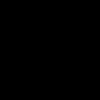

In [3]:
import net.imglib2.type.numeric.integer.UnsignedByteType

dims = [100, 100] as int[]
output = ij.op().run("create.img", dims, new UnsignedByteType())

ij.notebook().display(output)

Now that we have an output image we can create an `UnsignedByteType` and pass that (along with out output image) to `fill`:

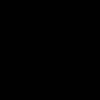

In [4]:
import net.imglib2.type.numeric.integer.UnsignedByteType

ij.op().run("fill", output, new UnsignedByteType(1))

ij.notebook().display(output)

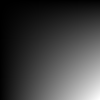

In [5]:
integral = ij.op().run("integral", output)

ij.notebook().display(integral)

Note that pixel is the sum of all of the pixels to the left and above that location in the input (which all have value `1`). Thus the pixels farther to the left and towards the top of the input image are relatively dark since the area of rectangles created between the origin and those pixels is much smaller than the area of rectangles between the origin and the pixels in the middle of the image.